# Data Visualizations

In [1]:
import os
os.environ["WANDB_DISABLED"] = "true"

## Load Packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
import seaborn as sns
import xgboost as xgb
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import hstack
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

## Load Data

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/ericiortega/ids705-phishing-detection/main/data/cleaning/2_cleaned_data.csv"
)

df

,sender,receiver,clean_text,urls,label
0,Tomas Jacobs <RickyAmes@aol.com>,the00@speedy.uwaterloo.ca,"Generic Cialis, branded quality@ \n\n\n\n\n\n...",0,1
1,Yan Morin <yan.morin@savoirfairelinux.com>,debian-mirrors@lists.debian.org,"Typo in /debian/README Hi, i've just updated f...",1,0
2,Sheila Crenshaw <7stocknews@tractionmarketing....,the00@plg.uwaterloo.ca,authentic viagra Mega authenticV I A G R A ...,1,1
3,Stormy Dempsey <vqucsmdfgvsg@ruraltek.com>,opt4@speedy.uwaterloo.ca,"Nice talking with ya \nHey Billy, \n\nit was r...",1,1
4,"""Christi T. Jernigan"" <dcube@totalink.net>",ktwarwic@speedy.uwaterloo.ca,or trembling; stomach cramps; trouble in sleep...,0,1
...,...,...,...,...,...
52708,SCC <Gerry.Rossi4360@kinki-kids.com>,Deficient <deficient@flax9.uwaterloo.ca>,Job: just for you. \n\n\n\nWhile we may ...,1,1
52709,Sydney Car Centre <Merrill8783@168city.com>,Gnitpick <gnitpick@flax9.uwaterloo.ca>,the reply for your request for a job place [le...,1,1
52710,Philippe Grosjean <phgrosjean@sciviews.org>,Duncan Murdoch <murdoch@stats.uwo.ca>,"Re: [R] Me again, about the horrible documenta...",1,0
52711,Bernhard Wellhöfer <Bernhard.Wellhoefer@gaia-g...,r-help@stat.math.ethz.ch,"Re: [R] RODBC problem Hello,\n\nas I wrote I c...",1,0


## Data Visualization 1 - Class Distribution Plot

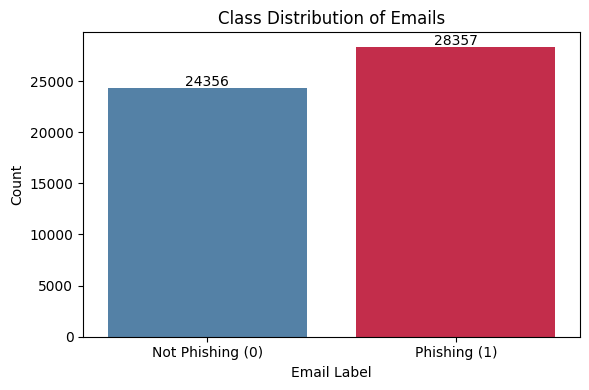

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', hue='label', palette={0: 'steelblue', 1: 'crimson'}, legend=False)
plt.xticks([0, 1], ['Not Phishing (0)', 'Phishing (1)'])
plt.title("Class Distribution of Emails")
plt.xlabel("Email Label")
plt.ylabel("Count")
for i, count in enumerate(df['label'].value_counts().sort_index()):
    plt.text(i, count + 200, str(count), ha='center')
plt.tight_layout()
plt.show()


## Data Visualization 2 - Top Words Bar Plot

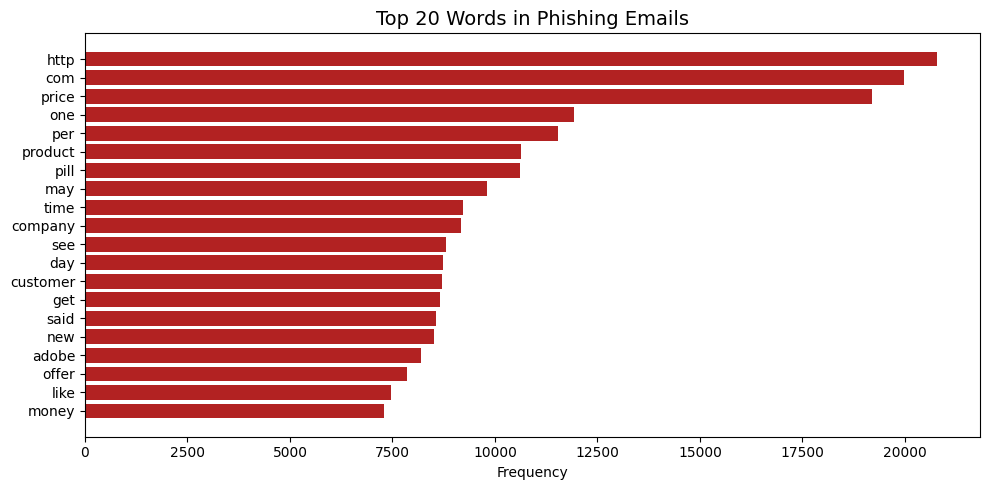

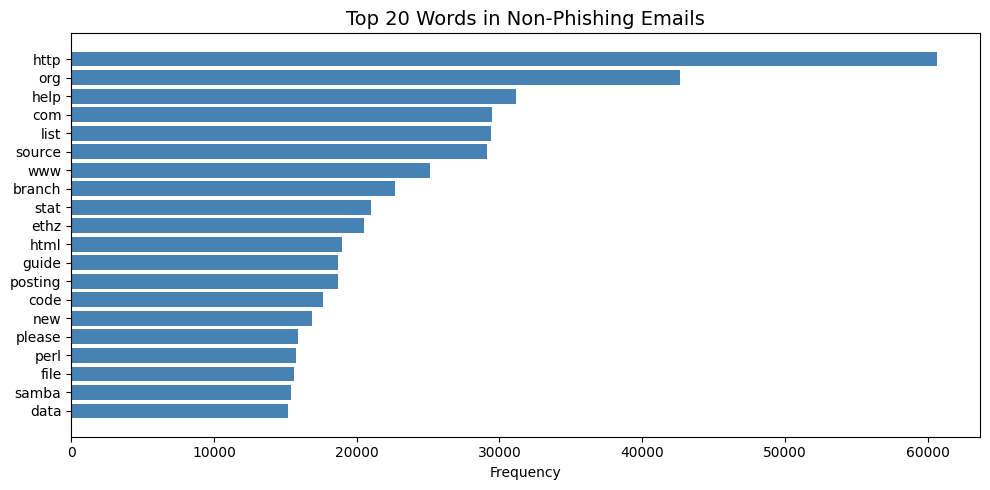

In [13]:
# Define custom preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_tokens'] = df['clean_text'].apply(clean_text)

# Split texts
phishing_texts = df[df['label'] == 1]['clean_tokens']
non_phishing_texts = df[df['label'] == 0]['clean_tokens']

# Vectorize and get top words for phishing
vectorizer = CountVectorizer(min_df=5)
X_phishing = vectorizer.fit_transform(phishing_texts)
phishing_freq = pd.DataFrame(X_phishing.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
phishing_freq.columns = ['count']
phishing_top = phishing_freq.sort_values(by='count', ascending=False).head(20)

# Vectorize and get top words for non-phishing
vectorizer = CountVectorizer(min_df=5)
X_non_phishing = vectorizer.fit_transform(non_phishing_texts)
non_phishing_freq = pd.DataFrame(X_non_phishing.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
non_phishing_freq.columns = ['count']
non_phishing_top = non_phishing_freq.sort_values(by='count', ascending=False).head(20)

# Plot phishing top words
plt.figure(figsize=(10, 5))
plt.barh(phishing_top.index[::-1], phishing_top['count'][::-1], color='firebrick')
plt.title('Top 20 Words in Phishing Emails', fontsize=14)
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

# Plot non-phishing top words
plt.figure(figsize=(10, 5))
plt.barh(non_phishing_top.index[::-1], non_phishing_top['count'][::-1], color='steelblue')
plt.title('Top 20 Words in Non-Phishing Emails', fontsize=14)
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()
